In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [4]:
device=torch.device('cuda:0')

In [5]:
# Step 2. Create model 建立model習慣建立class
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, B, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear_1=torch.nn.Linear(D_in, H)
        self.linear_2=torch.nn.Linear(H, B)
        self.linear_3=torch.nn.Linear(B, D_out)
    
    # Step 3. Forward pass-1/2    # Step 4. Backward pass-1/2
    def forward(self, x):
        h=self.linear_1(x)
        h_relu=torch.nn.functional.relu(h) #為何activation and hidden layer 的實現方式不同
        b=self.linear_2(h_relu) 
        b_relu=torch.nn.functional.relu(b)
        y_pred=self.linear_3(b_relu) 
        return y_pred
    
model= TwoLayerNet(D_in=6400, H=1000, B=1000, D_out=6400)
model=model.to(device) #這行是什麼意思? A:将模型加载到相应的设备

In [6]:
# Step 1. Prepare data-1/2
# DataLoader wraps a Dataset and provides minibatches, shuffling, multithreading, for you
data_in=np.loadtxt('./data/Re_100/input_div_u_fake.dat')
data_out=np.loadtxt('./data/Re_100/output_p.dat')
x=torch.Tensor(data_in)
y=torch.Tensor(data_out)

In [7]:
x=x.to(device)
y=y.to(device)

In [8]:
print(x.size())
print(y.size())

torch.Size([8251, 6400])
torch.Size([8251, 6400])


In [9]:
x=x[:8000]
y=y[:8000]

In [10]:
print(x.size())
print(y.size())

torch.Size([8000, 6400])
torch.Size([8000, 6400])


In [17]:
loader=DataLoader(TensorDataset(x, y), batch_size=200)
tol=1e-8

In [12]:
optimizer=torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

In [19]:
optimizer=torch.optim.RMSprop(lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

TypeError: __init__() missing 1 required positional argument: 'params'

In [16]:
loss_epoch=[]
loss_values = []
loss=1
epochs=0

print("Epochs    Loss")

while(loss>tol):
    epochs=epochs+1
    scheduler.step()
    
    for x_batch, y_batch in loader:
        # Forward pass
        y_pred=model(x_batch)
        loss=torch.nn.functional.mse_loss(y_pred, y_batch)
        
        # Backward pass
        loss.backward()
        
        # Update Weights
        optimizer.step()
        optimizer.zero_grad()
    
    loss_epoch.append(epochs)
    loss_values.append(loss.item())
    
    if epochs%1==0:
        print("Epochs: ", epochs, "; Loss: ", loss.item())
        
    loss=loss.item()

print(epochs, "    ", loss.item())

#Plot loss function
from matplotlib import pyplot as plt
plt.plot(loss_epoch, loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')

Epochs    Loss
Epochs:  1 ; Loss:  3.6264782465877943e-07
Epochs:  2 ; Loss:  1.7684297404230165e-07
Epochs:  3 ; Loss:  1.096881518947157e-07
Epochs:  4 ; Loss:  1.867683749878779e-07
Epochs:  5 ; Loss:  1.3362858908294584e-07
Epochs:  6 ; Loss:  1.277052774639742e-07
Epochs:  7 ; Loss:  3.2967741958600527e-07
Epochs:  8 ; Loss:  1.6620795406652178e-07
Epochs:  9 ; Loss:  2.5238588818865537e-07
Epochs:  10 ; Loss:  1.5458874713658588e-07
Epochs:  11 ; Loss:  2.7016943704438745e-07
Epochs:  12 ; Loss:  2.198777337980573e-07
Epochs:  13 ; Loss:  1.9202610701540834e-07
Epochs:  14 ; Loss:  1.868440904218005e-07
Epochs:  15 ; Loss:  4.789598619936442e-07
Epochs:  16 ; Loss:  2.65542865918178e-07
Epochs:  17 ; Loss:  2.1676049755114946e-07
Epochs:  18 ; Loss:  1.1597840909871593e-07
Epochs:  19 ; Loss:  1.8917525324013695e-07
Epochs:  20 ; Loss:  1.3498060980055016e-07
Epochs:  21 ; Loss:  1.3008610721954028e-07
Epochs:  22 ; Loss:  1.0716532727883532e-07
Epochs:  23 ; Loss:  1.09303009310

AttributeError: 'float' object has no attribute 'item'

Text(0, 0.5, 'loss')

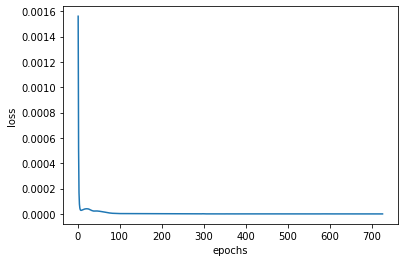

In [14]:
#Plot loss function
from matplotlib import pyplot as plt
plt.plot(loss_epoch, loss_values)
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
device=torch.device('cpu')
model=model.to(device)
PATH= "model_jit_E.pth"
traced_net=torch.jit.trace(model, (torch.randn(1,6400).to(torch.float64)).to(device))
traced_net.to(torch.float64)
torch.jit.save(traced_net, PATH)